#**Ağ Anomalisi Tespiti**

# Hesaplarımız :
###Github -> https://github.com/meryemarpaci/YZVM-Machine-Learning-Project
###Trello -> https://trello.com/b/q8WCnXK9/yzvm-ml-project

#Gerekli Kütüphaneler

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
!pip install category_encoders
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
!pip install klib
import klib as kl
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import itertools
from sklearn.ensemble import RandomForestClassifier
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.tree  import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
!pip install catboost
from catboost import CatBoostClassifier
!pip install optuna
import optuna
!pip install xgboost
import xgboost as xgb

# Veri Setine Genel Bakış

In [3]:
df = pd.read_csv("/content/Train_data.csv")

In [4]:
df.shape

(25193, 42)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,25192.0,305.054104,2.686556e+03,0.0,0.00,0.00,0.00,42862.0
src_bytes,25192.0,24330.628215,2.410805e+06,0.0,0.00,44.00,279.00,381709090.0
dst_bytes,25192.0,3491.847174,8.883072e+04,0.0,0.00,0.00,530.25,5151385.0
land,25192.0,0.000079,8.909946e-03,0.0,0.00,0.00,0.00,1.0
wrong_fragment,25192.0,0.023738,2.602208e-01,0.0,0.00,0.00,0.00,3.0
urgent,25192.0,0.000040,6.300408e-03,0.0,0.00,0.00,0.00,1.0
hot,25192.0,0.198039,2.154202e+00,0.0,0.00,0.00,0.00,77.0
num_failed_logins,25192.0,0.001191,4.541818e-02,0.0,0.00,0.00,0.00,4.0
logged_in,25192.0,0.394768,4.888105e-01,0.0,0.00,0.00,1.00,1.0
num_compromised,25192.0,0.227850,1.041735e+01,0.0,0.00,0.00,0.00,884.0


In [6]:
df.dtypes

duration                       float64
protocol_type                   object
service                         object
flag                            object
src_bytes                      float64
dst_bytes                      float64
land                           float64
wrong_fragment                 float64
urgent                         float64
hot                            float64
num_failed_logins              float64
logged_in                      float64
num_compromised                float64
root_shell                     float64
su_attempted                   float64
num_root                       float64
num_file_creations             float64
num_shells                     float64
num_access_files               float64
num_outbound_cmds              float64
is_host_login                  float64
is_guest_login                 float64
count                          float64
srv_count                      float64
serror_rate                    float64
srv_serror_rate          

## Bazı Sütunların Özellikleri:

* Duration:  Bağlantı süresinin uzunluğu
* Protocol_type: Bağlantıda kullanılan protokol
* Service: Kullanılan hedef ağ hizmeti
* Flag: Bağlantı durumu - Normal veya Hata
* Src_bytes: Tek bağlantıda kaynaktan hedefe aktarılan veri baytlarının sayısı
* Dst_bytes: Tek bağlantıda hedeften kaynağa aktarılan veri baytlarının sayısı
* Land: kaynak ve hedef IP adresleri ve port numaraları eşitse, bu değişken 1 değerini alır, aksi takdirde 0
* Wrong_fragment: Bu bağlantıdaki toplam yanlış parça sayısı
* Urgent: Bu bağlantıdaki acil paketlerin sayısı. Acil paketler, acil biti etkinleştirilmiş paketlerdir


In [7]:
df.isnull().sum()

duration                       1
protocol_type                  1
service                        1
flag                           1
src_bytes                      1
dst_bytes                      1
land                           1
wrong_fragment                 1
urgent                         1
hot                            1
num_failed_logins              1
logged_in                      1
num_compromised                1
root_shell                     1
su_attempted                   1
num_root                       1
num_file_creations             1
num_shells                     1
num_access_files               1
num_outbound_cmds              1
is_host_login                  1
is_guest_login                 1
count                          1
srv_count                      1
serror_rate                    1
srv_serror_rate                1
rerror_rate                    1
srv_rerror_rate                1
same_srv_rate                  1
diff_srv_rate                  1
srv_diff_h

In [8]:
null_satir = df[df.isnull().any(axis=1)]
null_satir

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


167. satırdaki bütün sütunların boş değerlere sahip olduğu görüldü.

In [9]:
df = df.drop(null_satir.index)

In [10]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

#Görselleştirme

In [11]:
df["class"].value_counts()

class
normal     13449
anomaly    11743
Name: count, dtype: int64

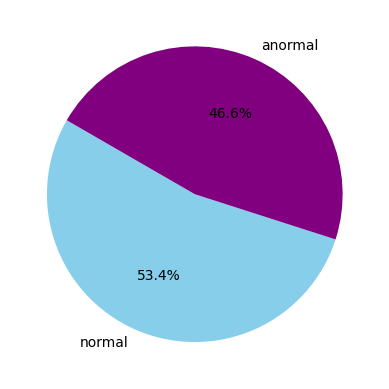

<Figure size 1152x864 with 0 Axes>

In [12]:
service_counts = df['class'].value_counts(ascending=False).values
plt.pie(service_counts, labels=["normal","anormal"], startangle=150,autopct='%1.1f%%', colors=['skyblue', 'purple']);
plt.figure(dpi=180)
plt.show()



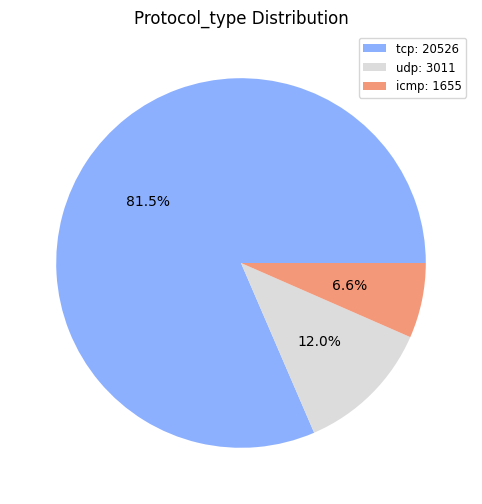

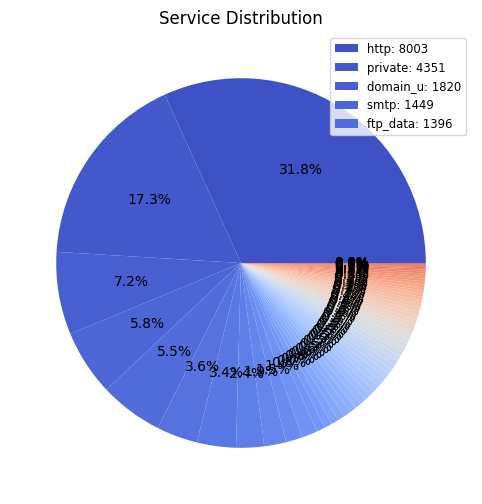

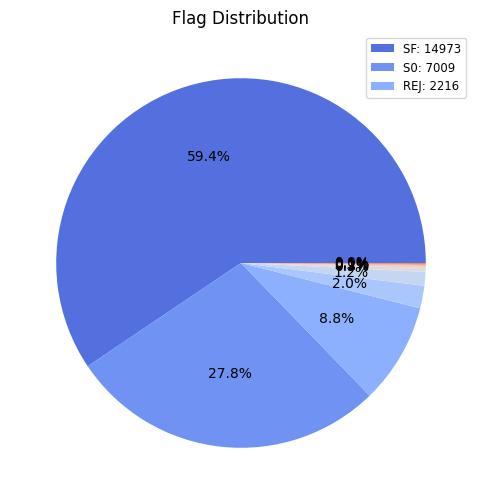

In [13]:
threshold_percentage = 5  # Eşik yüzdesi

for category in ['protocol_type', 'service', 'flag']:
    abs_values = df[category].value_counts().values
    labels = df[category].value_counts().index
    colors = sns.color_palette("coolwarm", len(abs_values))

    plt.figure(figsize=(8, 6))
    pie = plt.pie(abs_values, labels=None, autopct='%1.1f%%', colors=colors)
    plt.title(f"{category.capitalize()} Distribution")

    # Renk eşleme tablosunu oluştur
    legend_labels = [f'{label}: {value}' for label, value in zip(labels, abs_values) if value / sum(abs_values) * 100 > threshold_percentage]
    plt.legend(legend_labels, loc='best', fontsize='small')

    plt.show()


##Kategorik Değişkenler İçin Uniq Değerler

In [14]:
deger = ['protocol_type', 'service', 'flag']
for a in deger:
    print(a,"İçin Uniq Değerler ")
    unique = df[a].unique()
    print(unique)
    print(a," için Uniq Degerlerin Sayısı:", len(unique),"\n")

protocol_type İçin Uniq Değerler 
['tcp' 'udp' 'icmp']
protocol_type  için Uniq Degerlerin Sayısı: 3 

service İçin Uniq Değerler 
['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001']
service  için Uniq Degerlerin Sayısı: 66 

flag İçin Uniq Değerler 
['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
flag  için Uniq Degerlerin Sayısı: 11 



#Verileri Ölçeklendirme

In [15]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(df)

<Axes: title={'center': 'Feature-correlation (pearson)'}>

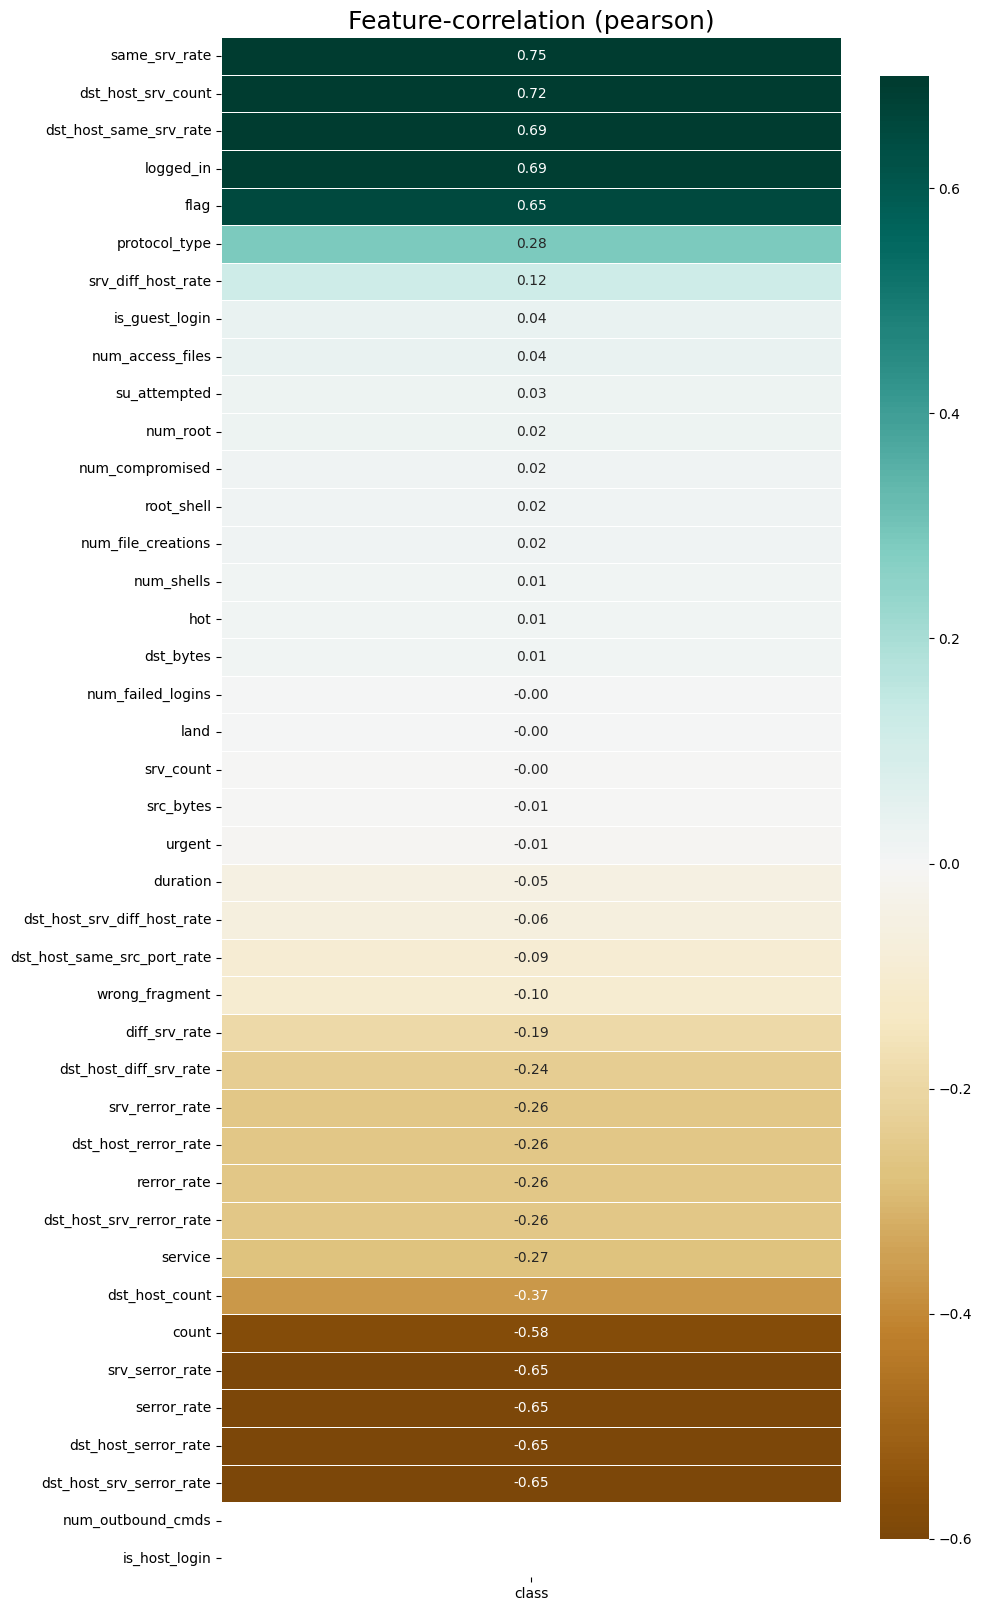

In [16]:
kl.corr_plot(df,figsize=(10,20),target='class')

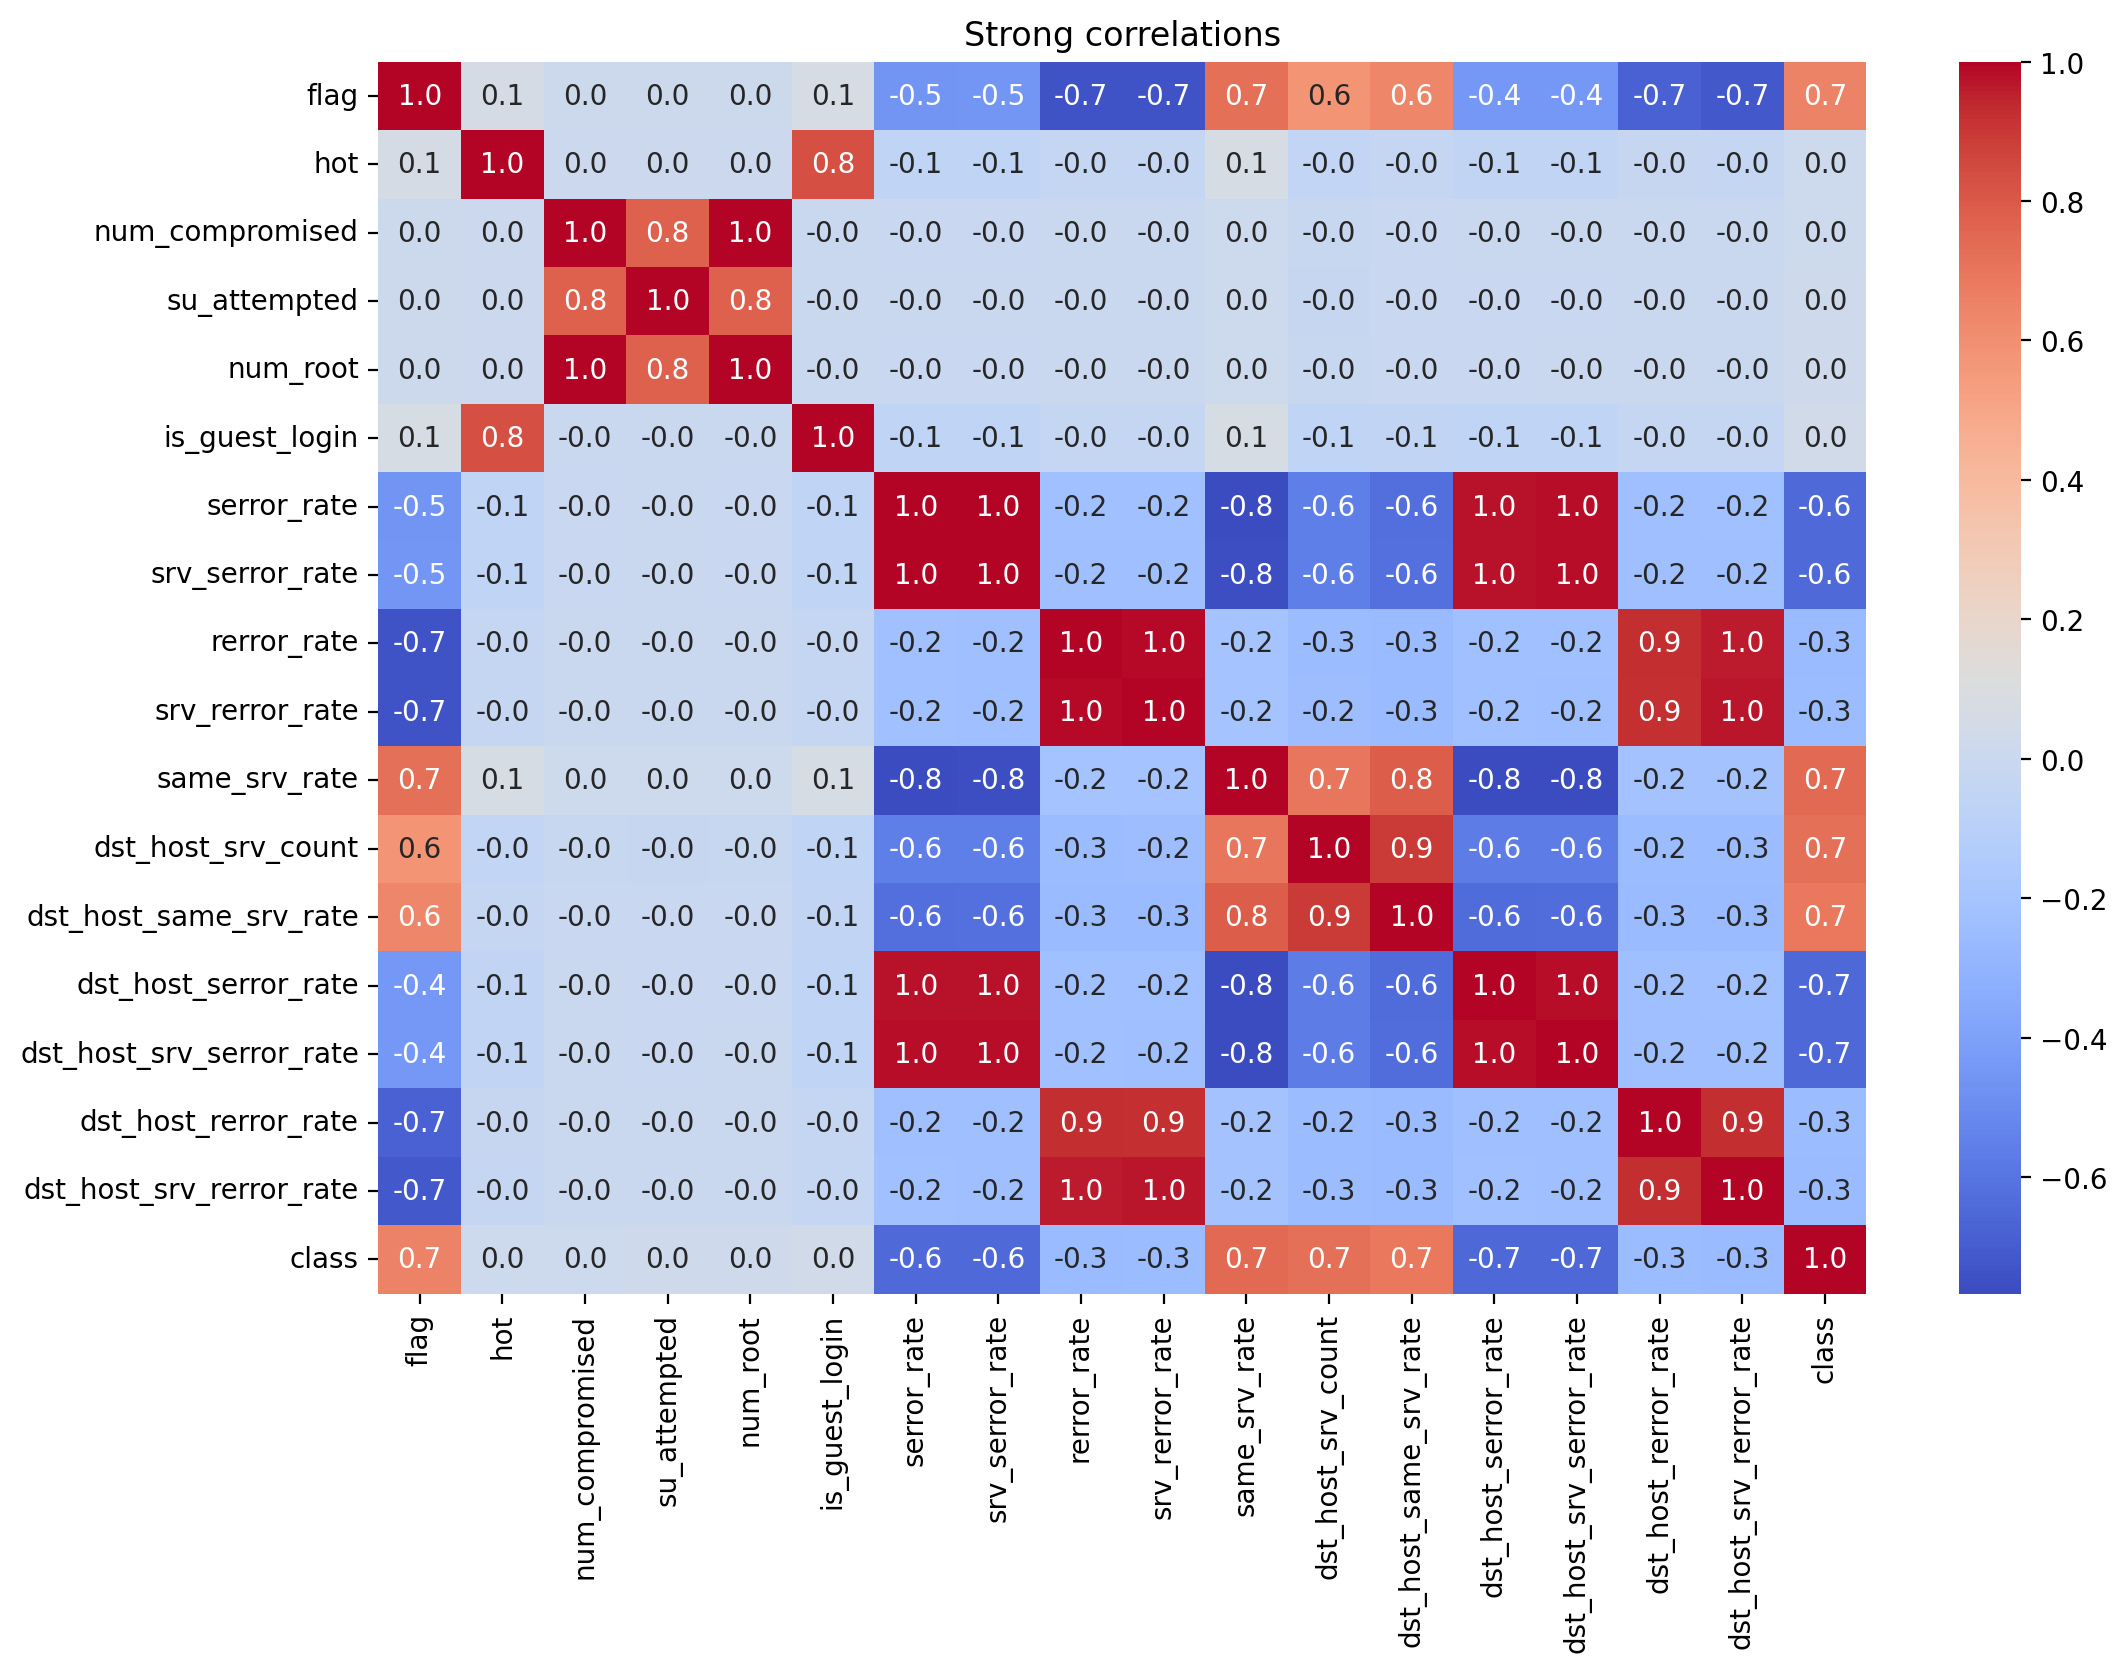

In [79]:

corr_matrix = df.corr()
threshold = 0.7

mask = np.abs(corr_matrix) >= threshold
np.fill_diagonal(mask.values, False)

filtered_columns = corr_matrix.columns[mask.any()]
filtered_corr = corr_matrix.loc[filtered_columns, filtered_columns]

plt.figure(figsize=(12, 8), dpi=200)
sns.heatmap(filtered_corr, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Strong correlations')
plt.show()


In [18]:
X = df.drop(['class','num_root', 'srv_serror_rate', 'srv_rerror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate',], axis=1)

In [19]:
y = df['class']

In [20]:
scaler = RobustScaler()
X = scaler.fit_transform(X)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=230)

In [22]:
"""
rfc = RandomForestClassifier();


rfc.fit(x_train, y_train);

score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':x_train.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();
"""

"\nrfc = RandomForestClassifier();\n\n\nrfc.fit(x_train, y_train);\n\nscore = np.round(rfc.feature_importances_,3)\nimportances = pd.DataFrame({'feature':x_train.columns,'importance':score})\nimportances = importances.sort_values('importance',ascending=False).set_index('feature')\n\nplt.rcParams['figure.figsize'] = (11, 4)\nimportances.plot.bar();\n"

##Modeller

In [23]:
NB = GaussianNB()

NB.fit(x_train, y_train)

GaussianNB()

In [24]:
pred_nb = NB.predict(x_test)

accuracy_nb = accuracy_score(y_test, pred_nb)
print("Accuracy:", accuracy_nb)

classi_report = classification_report(y_test, pred_nb)
print("Classification Report:\n", classi_report)

Accuracy: 0.8908513593967057
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      2385
           1       0.93      0.86      0.89      2654

    accuracy                           0.89      5039
   macro avg       0.89      0.89      0.89      5039
weighted avg       0.89      0.89      0.89      5039



In [25]:
LR = LogisticRegression()

param_grid = {
    'C': [0.01, 0.1, 1.0],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

grid_search = GridSearchCV(estimator=LR, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)

#en iyi max_iter=1000
print("En iyi parametreler:", grid_search.best_params_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
81 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

En iyi parametreler: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [26]:
LR = LogisticRegression(max_iter=1000, C=0.1, penalty='l2', solver='newton-cg')
LR.fit(x_train, y_train)

LogisticRegression(C=0.1, max_iter=1000, solver='newton-cg')

In [27]:
pred_lr = LR.predict(x_test)

accuracy_lr = accuracy_score(y_test, pred_lr)
print("Accuracy:", accuracy_lr)

classi_report = classification_report(y_test, pred_lr)
print("Classification Report:\n", classi_report)

Accuracy: 0.9523715022821988
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      2385
           1       0.95      0.96      0.96      2654

    accuracy                           0.95      5039
   macro avg       0.95      0.95      0.95      5039
weighted avg       0.95      0.95      0.95      5039



In [71]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt'],
    'bootstrap': [False]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

print("En iyi parametreler: ", grid_search.best_params_)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(x_test)

print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
En iyi parametreler:  {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2385
           1       0.99      1.00      1.00      2654

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



In [75]:
rf = RandomForestClassifier(bootstrap=False, max_depth=None, max_features='sqrt',
                                  min_samples_leaf=1, min_samples_split=2, n_estimators=100)


rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_pred)
print("Doğruluk (Accuracy):", accuracy_rf)

print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

Doğruluk (Accuracy): 0.9964278626711649

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2385
           1       1.00      1.00      1.00      2654

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



In [28]:
RMSE = []
for k in range(20):
  k = k+1
  KNN=KNeighborsRegressor(n_neighbors=k).fit(x_train,y_train)
  y_pred = KNN.predict(x_test)
  rmse=np.sqrt(mean_squared_error(y_test, y_pred))
  RMSE.append(rmse)
  print("k =",k,"icin RMSE degeri :",rmse)


k = 1 icin RMSE degeri : 0.11616686713535689
k = 2 icin RMSE degeri : 0.10957349344783333
k = 3 icin RMSE degeri : 0.10677063795668455
k = 4 icin RMSE degeri : 0.10699628034998175
k = 5 icin RMSE degeri : 0.10758124811241819
k = 6 icin RMSE degeri : 0.10846104338281273
k = 7 icin RMSE degeri : 0.10997011583291905
k = 8 icin RMSE degeri : 0.11134205398996244
k = 9 icin RMSE degeri : 0.1121099074221254
k = 10 icin RMSE degeri : 0.11386340054175935
k = 11 icin RMSE degeri : 0.11534508851762108
k = 12 icin RMSE degeri : 0.11708855950384954
k = 13 icin RMSE degeri : 0.11845909793187447
k = 14 icin RMSE degeri : 0.1198983954241407
k = 15 icin RMSE degeri : 0.12139807250031391
k = 16 icin RMSE degeri : 0.12305303033028872
k = 17 icin RMSE degeri : 0.12440740211963157
k = 18 icin RMSE degeri : 0.1257598018933921
k = 19 icin RMSE degeri : 0.12682473377465564
k = 20 icin RMSE degeri : 0.12749397333502993


In [29]:
KNN=KNeighborsRegressor(n_neighbors=2)
KNN.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [30]:
y_pred = KNN.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

classi_report = classification_report(y_test, y_pred)
print("Sınıflandırma Raporu:\n", classi_report)

accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy Değeri:", accuracy_knn)

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2385
           1       0.99      0.98      0.98      2654

    accuracy                           0.98      5039
   macro avg       0.98      0.98      0.98      5039
weighted avg       0.98      0.98      0.98      5039

Accuracy Değeri: 0.9823377654296488


In [31]:
SVC = LinearSVC()
SVC.fit(x_train, y_train)

y_pred = SVC.predict(x_test)

classi_report = classification_report(y_test, y_pred)

print("Sınıflandırma Raporu:\n", classi_report)

accuracy_svc = accuracy_score(y_test, y_pred)
print("Accuracy Değeri:", accuracy_svc)

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      2385
           1       0.94      0.96      0.95      2654

    accuracy                           0.95      5039
   macro avg       0.95      0.94      0.95      5039
weighted avg       0.95      0.95      0.95      5039

Accuracy Değeri: 0.945624131772177


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [32]:
def objective(trial):
    dt_max_depth = trial.suggest_int('dt_max_depth', 2, 32, log=False)
    dt_max_features = trial.suggest_int('dt_max_features', 2, 10, log=False)
    classifier_obj = DecisionTreeClassifier(max_features = dt_max_features, max_depth = dt_max_depth)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [ ]:
study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective, n_trials=30)
print(study_dt.best_trial)

In [34]:
dt = DecisionTreeClassifier(max_features = study_dt.best_trial.params['dt_max_features'], max_depth = study_dt.best_trial.params['dt_max_depth'])
dt.fit(x_train, y_train)

pred_dt = dt.predict(x_test)

accuracy_dt = accuracy_score(y_test, pred_dt)
print("Accuracy:", accuracy_dt)

classi_report = classification_report(y_test, pred_dt)
print("Classification Report:\n", classi_report)

Accuracy: 0.9938479857114507
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2385
           1       0.99      1.00      0.99      2654

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg       0.99      0.99      0.99      5039



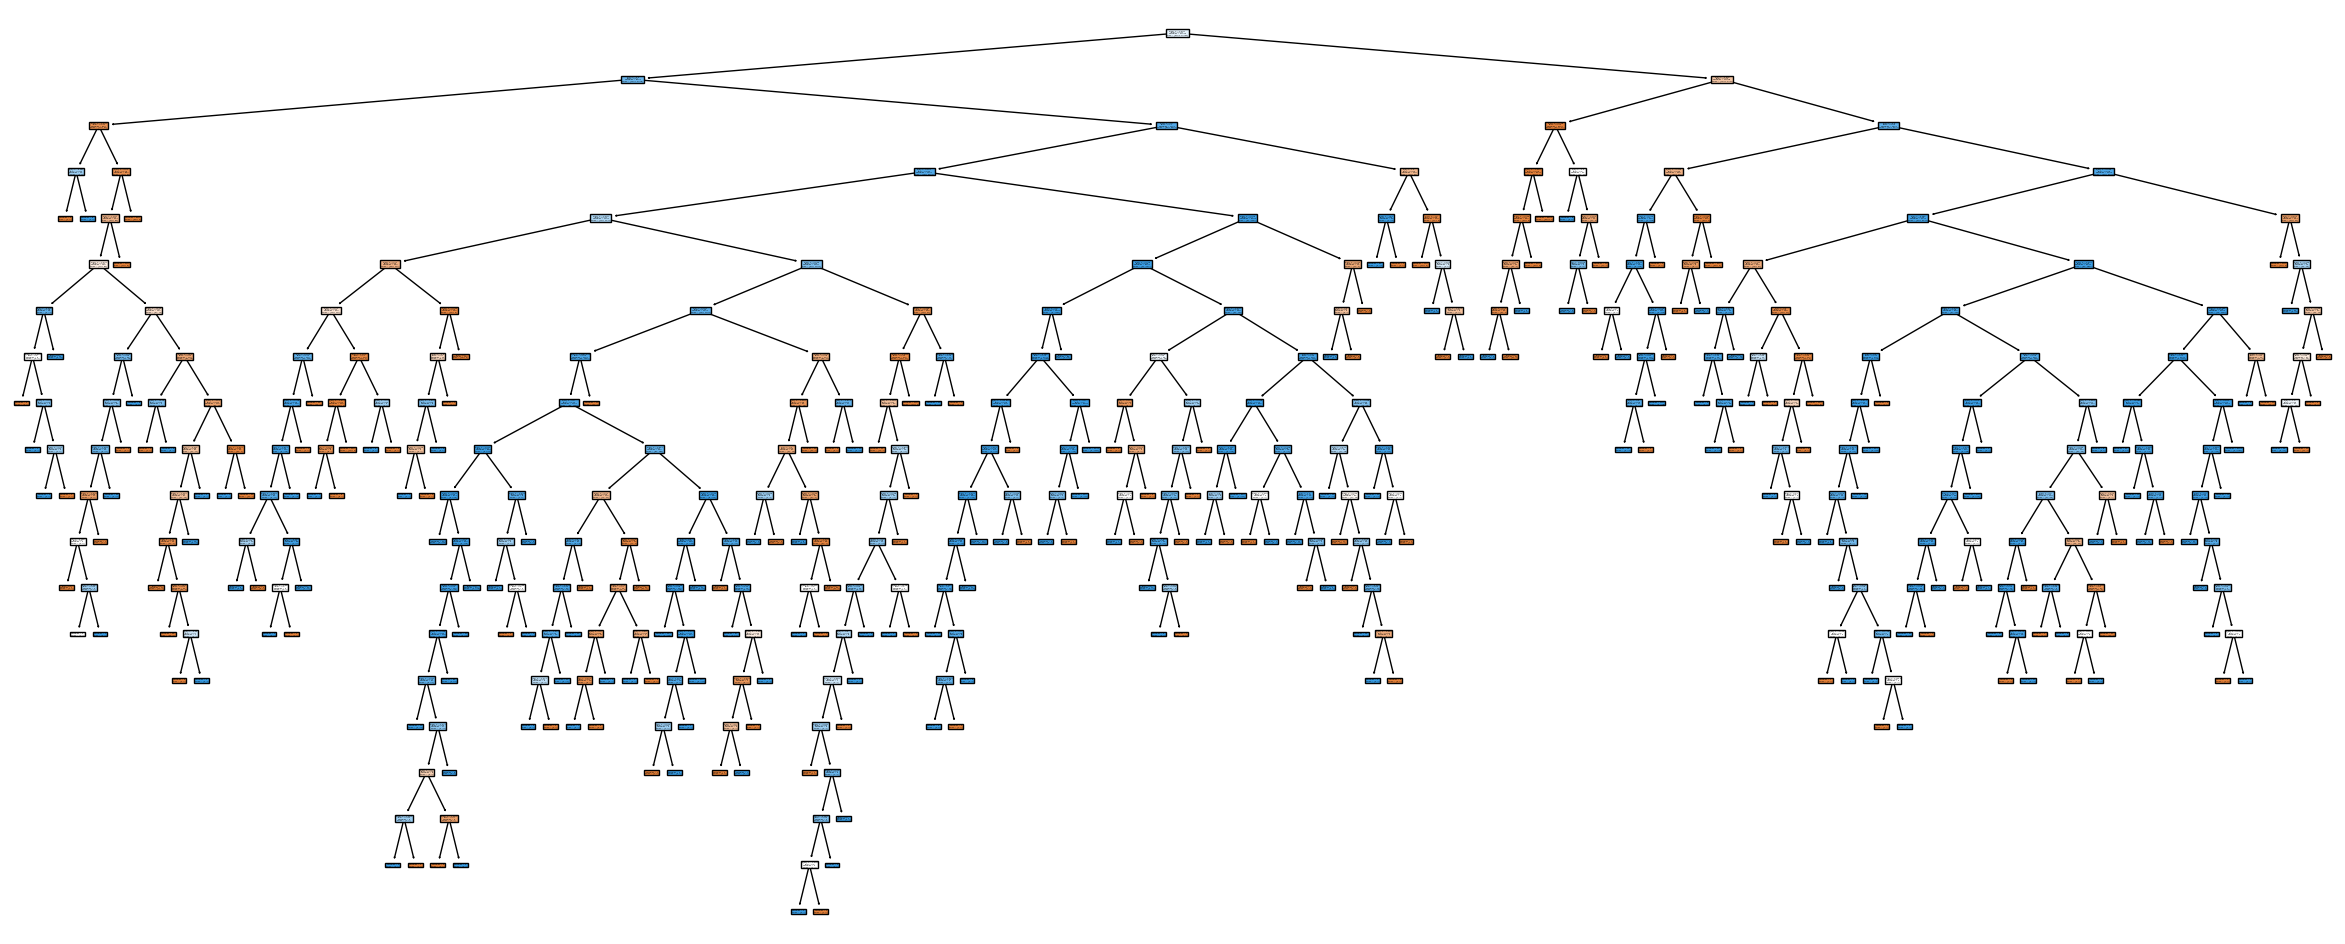

In [35]:
fig = plt.figure(figsize = (30,12))
tree.plot_tree(dt, filled=True);
plt.show()

In [36]:
"""
rfe = RFE(rfc, n_features_to_select=17)
rfe = rfe.fit(x_train, y_train)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), x_train.columns)]
select_features = [v for i, v in feature_map if i==True]

select_features
"""


'\nrfe = RFE(rfc, n_features_to_select=17)\nrfe = rfe.fit(x_train, y_train)\n\nfeature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), x_train.columns)]\nselect_features = [v for i, v in feature_map if i==True]\n\nselect_features\n'

In [37]:
"""

models = []
models.append(('Decision Tree Classifier', dt))
models.append(('KNeighborsClassifier', KNN))
models.append(('Linear support vector', SVC))
models.append(('LogisticRegression', LR))
models.append(('GaussianNB', NB))


for i, v in models:
    v.fit(x_train, y_train)
    scores = cross_val_score(v, x_train, y_train, cv=10)
    accuracy = metrics.accuracy_score(y_train, v.predict(x_train))
    confusion_matrix = metrics.confusion_matrix(y_train, v.predict(x_train))
    classification = metrics.classification_report(y_train, v.predict(x_train))

    print()
    print('============================== {} Model Çıktıları =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification)
    print()
    """


'\n\nmodels = []\nmodels.append((\'Decision Tree Classifier\', dt))\nmodels.append((\'KNeighborsClassifier\', KNN))\nmodels.append((\'Linear support vector\', SVC))\nmodels.append((\'LogisticRegression\', LR))\nmodels.append((\'GaussianNB\', NB))\n\n\nfor i, v in models:\n    v.fit(x_train, y_train)\n    scores = cross_val_score(v, x_train, y_train, cv=10)\n    accuracy = metrics.accuracy_score(y_train, v.predict(x_train))\n    confusion_matrix = metrics.confusion_matrix(y_train, v.predict(x_train))\n    classification = metrics.classification_report(y_train, v.predict(x_train))\n\n    print()\n    print(\'============================== {} Model Çıktıları ==============================\'.format(i))\n    print()\n    print ("Cross Validation Mean Score:" "\n", scores.mean())\n    print()\n    print ("Model Accuracy:" "\n", accuracy)\n    print()\n    print("Confusion matrix:" "\n", confusion_matrix)\n    print()\n    print("Classification report:" "\n", classification)\n    print()\n   

In [ ]:
CB = CatBoostClassifier()
CB.fit(x_train, y_train)
y_pred = CB.predict(x_test)

In [81]:
accuracy_cb = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_cb)

classi_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classi_report)

Accuracy: 0.9952371502282199
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2385
           1       0.99      1.00      1.00      2654

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



In [39]:
XGB = xgb.XGBClassifier()
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=XGB, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)

print("En iyi parametreler:", grid_search.best_params_)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
En iyi parametreler: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1.0}


In [57]:
XGB = xgb.XGBClassifier(colsample_bytree=0.7,
                              learning_rate=0.1,
                              max_depth=7,
                              min_child_weight=1,
                              n_estimators=200,
                              subsample=1.0)

XGB.fit(x_train, y_train)
pred_xgb = XGB.predict(x_test)

accuracy_xgb = accuracy_score(y_test, pred_xgb)
print("Accuracy:", accuracy_xgb)

classi_report = classification_report(y_test, pred_xgb)
print("Classification Report:\n", classi_report)


Accuracy: 0.9962294105973407
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      2385
           1       0.99      1.00      1.00      2654

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



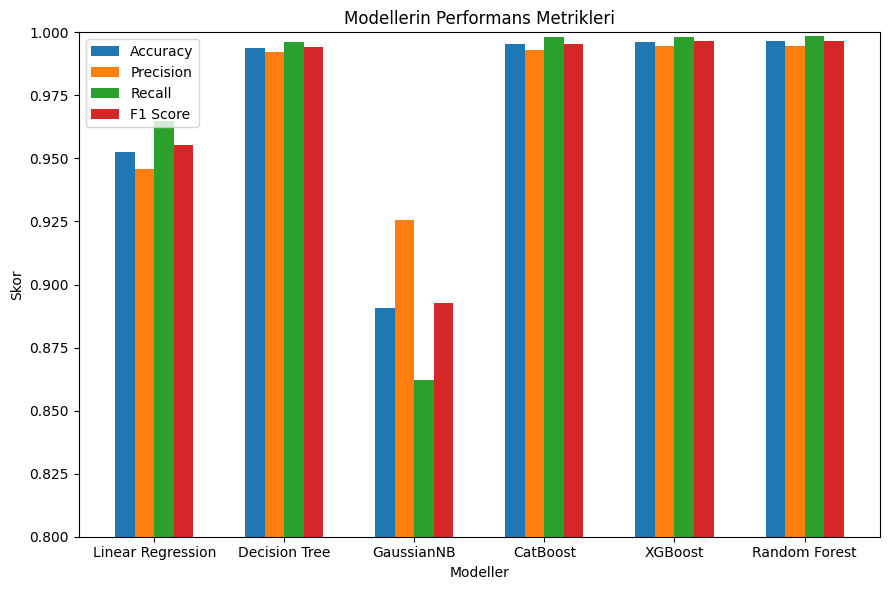

In [77]:

predictions = {
    'Linear Regression': LR.predict_proba(x_test)[:,1],
    'Decision Tree': dt.predict_proba(x_test)[:,1],
    'GaussianNB': NB.predict_proba(x_test)[:,1],
    'CatBoost': CB.predict_proba(x_test)[:,1],
    'XGBoost': XGB.predict_proba(x_test)[:,1],
    'Random Forest': rf.predict_proba(x_test)[:,1]

}
def compute_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

models = list(predictions.keys())
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
results = {metric: {model: [] for model in models} for metric in metrics}

for model in models:
    y_pred = np.where(predictions[model] >= 0.5, 1, 0)
    accuracy, precision, recall, f1 = compute_metrics(y_test, y_pred)
    results['Accuracy'][model] = accuracy
    results['Precision'][model] = precision
    results['Recall'][model] = recall
    results['F1 Score'][model] = f1

plt.figure(figsize=(9, 6))
x = np.arange(len(models))

width = 0.15
for i, metric in enumerate(metrics):
    plt.bar(x + i * width, [results[metric][model] for model in models], width=width, label=metric)

plt.xlabel('Modeller')
plt.ylabel('Skor')
plt.title('Modellerin Performans Metrikleri')
plt.xticks(x + width * (len(metrics) - 1) / 2, models)
plt.ylim(0.8, 1)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


##ROC Eğrisi

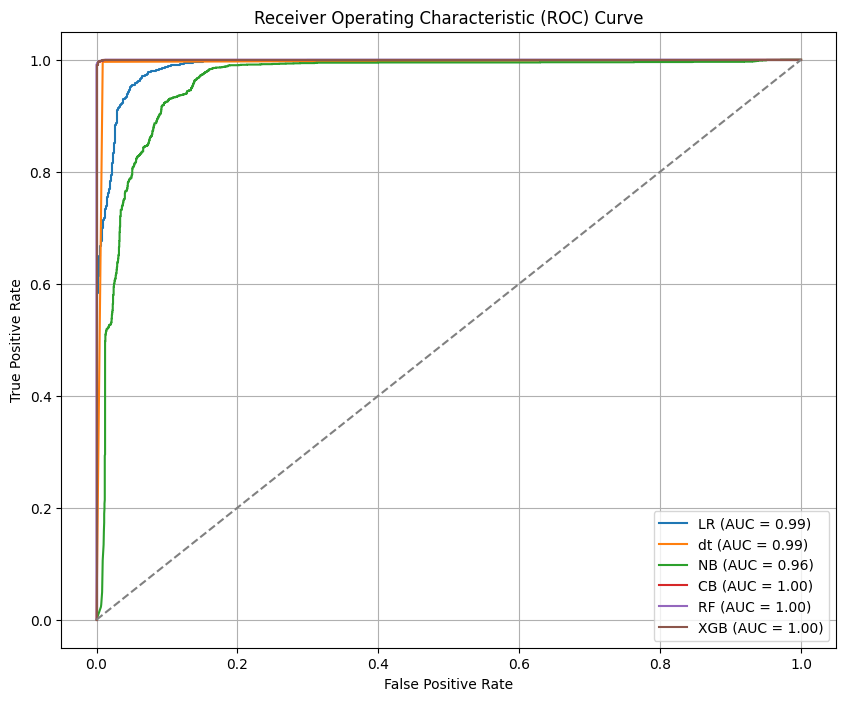

In [78]:
from sklearn.metrics import roc_curve, auc
y_preds = {'LR': LR.predict_proba(x_test)[:,1],
           'dt': dt.predict_proba(x_test)[:,1],
           'NB': NB.predict_proba(x_test)[:,1],
           'CB': CB.predict_proba(x_test)[:,1],
           'RF': best_rf.predict_proba(x_test)[:,1],
           'XGB': XGB.predict_proba(x_test)[:,1]}


plt.figure(figsize=(10, 8))

for model_name, y_pred in y_preds.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()